In [2]:
#import librarys
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter
import plotly.graph_objs as go
import plotly.express as px
import warnings 
warnings.simplefilter("ignore")
#round the display float number in lambda x :'%.0f'%x, 0 is the index where u wana round
pd.set_option('display.float_format', lambda x: '%.2f' % x)

df=pd.read_csv('Maternal Health Risk Data Set.csv')





df.describe()



,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.00,1014.00,1014.00,1014.00,1014.00,1014.00
mean,29.87,113.20,76.46,8.73,98.67,74.30
std,13.47,18.40,13.89,3.29,1.37,8.09
min,10.00,70.00,49.00,6.00,98.00,7.00
25%,19.00,100.00,65.00,6.90,98.00,70.00
50%,26.00,120.00,80.00,7.50,98.00,76.00
75%,39.00,120.00,90.00,8.00,98.00,80.00
max,70.00,160.00,100.00,19.00,103.00,90.00


array([<AxesSubplot: ylabel='RiskLevel'>], dtype=object)

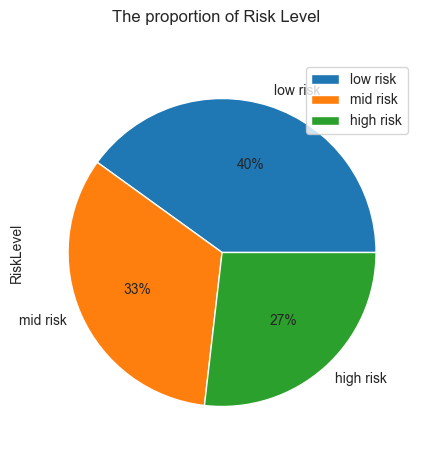

In [4]:
#Plot the proportion pie chart
RiskLevel = df.iloc[:,-1]
ratio = pd.DataFrame(RiskLevel.value_counts())
ratio.plot.pie(subplots = True,figsize=(5,5), autopct='%1.0f%%',title = 'The proportion of Risk Level')


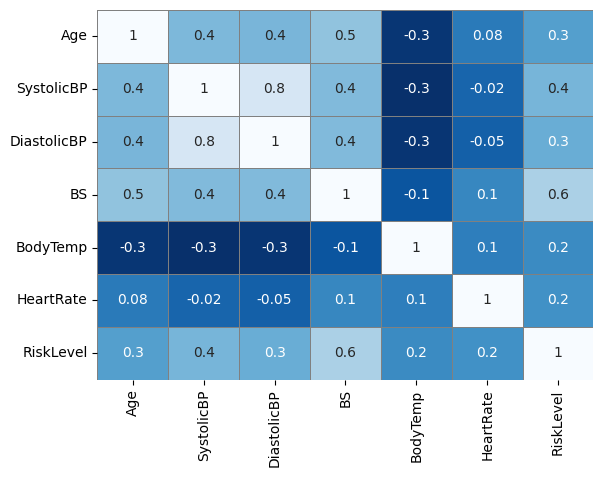

In [70]:
#plot the correlationn heatmap
df2 = df.copy()#copy the original dataframe, so that the original value won't change
df2['RiskLevel'] = df2['RiskLevel'].replace({'low risk':1, 'mid risk': 2, 'high risk': 3})
df2['RiskLevel']= df2['RiskLevel'].astype('int')

sns.heatmap(df2.corr(), annot=True, fmt='.1g', cmap="Blues_r", cbar=False, linewidths=0.5, linecolor='grey');

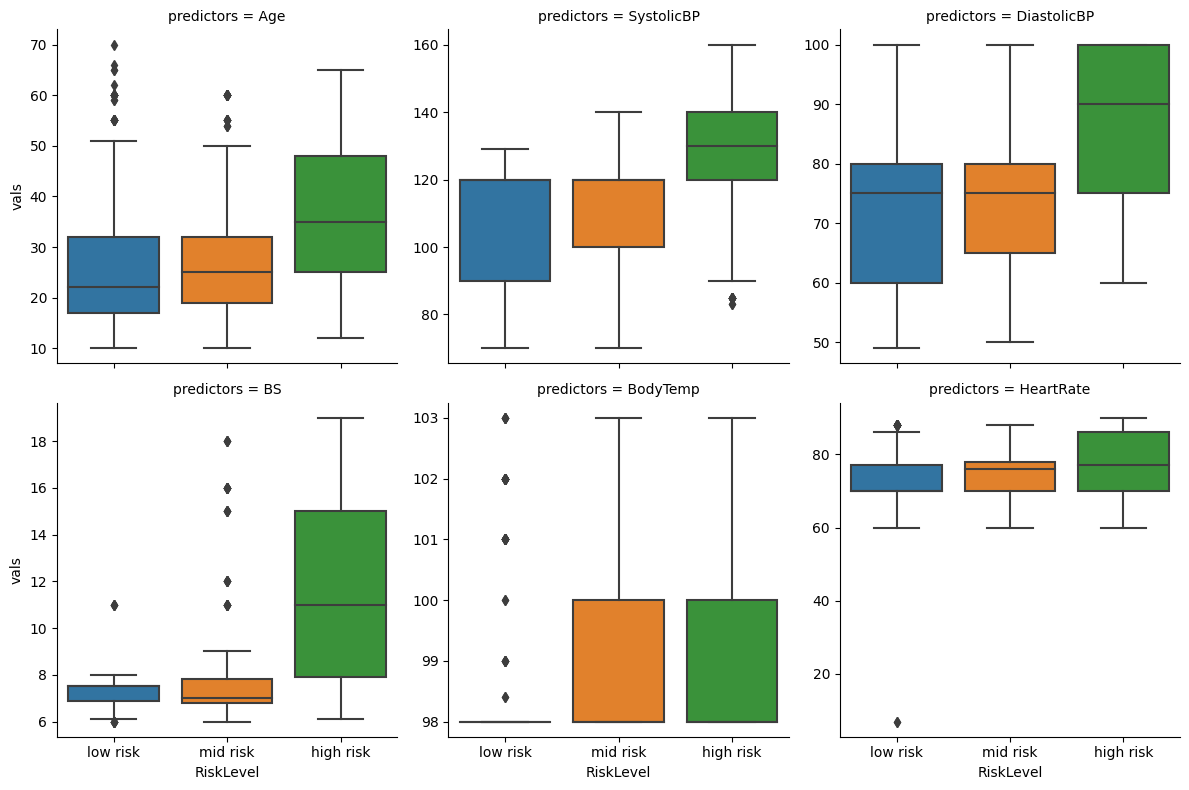

In [71]:
# make a new df by df.melt, to generate the catplot(box plot)
dfm = df.melt('RiskLevel', var_name='predictors', value_name='vals')

sns.catplot(x="RiskLevel",order=['low risk','mid risk','high risk'],
            y="vals",col='predictors', data=dfm, kind='box', col_wrap=3, height=4, aspect=1,
            sharey=False
            )